In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [11]:
data = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/AlgoTrading/Part3_Materials/intraday.csv", parse_dates=["time"], index_col="time")

In [12]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


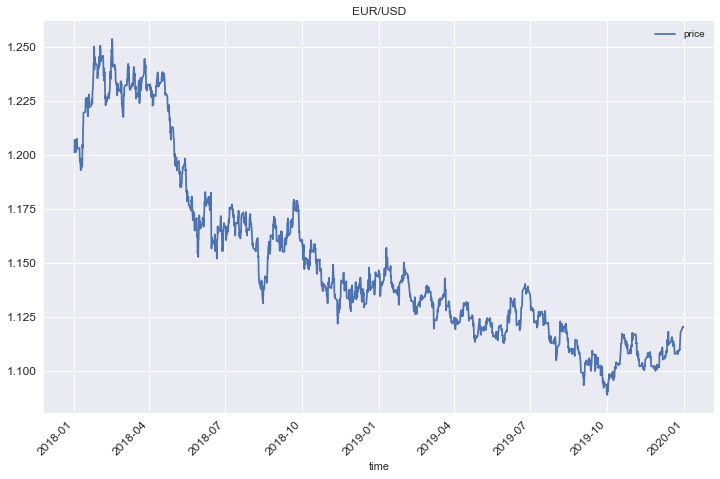

In [15]:
data.plot(figsize=(12, 8), title="EUR/USD", fontsize=12)
plt.xticks(rotation=45)
plt.show()

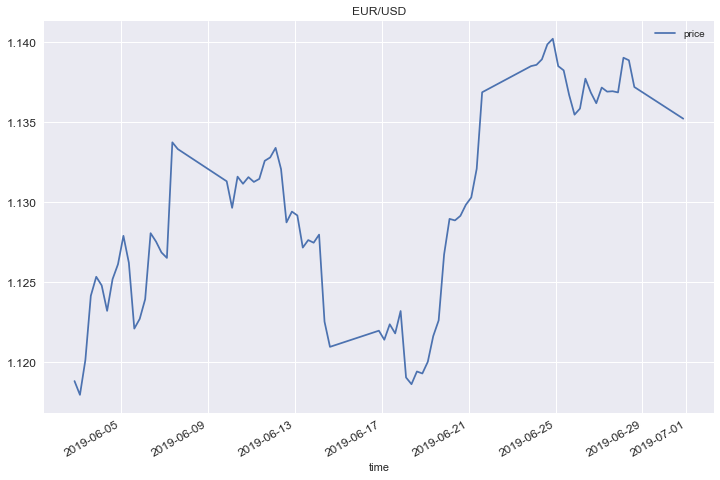

In [17]:
data.loc["2019-06"].plot(figsize=(12,8), title="EUR/USD", fontsize=12)
plt.show()

In [18]:
data["returns"] = np.log(data.div(data.shift(1)))

In [19]:
data.dropna(inplace=True)

In [20]:
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [21]:
window = 3

In [24]:
data["returns"].rolling(window).mean()

time
2018-01-02 04:00:00+00:00             NaN
2018-01-02 10:00:00+00:00             NaN
2018-01-02 16:00:00+00:00    1.272676e-03
2018-01-02 22:00:00+00:00   -6.537454e-04
2018-01-03 04:00:00+00:00   -1.702470e-04
                                 ...     
2019-12-29 22:00:00+00:00    1.808598e-03
2019-12-30 04:00:00+00:00    1.085156e-03
2019-12-30 10:00:00+00:00    7.492899e-04
2019-12-30 16:00:00+00:00   -1.691355e-17
2019-12-30 22:00:00+00:00    1.234956e-04
Name: returns, Length: 2069, dtype: float64

In [28]:
data["position"] = -np.sign(data["returns"].rolling(window).mean()) # Contrarian

In [29]:
data

,price,returns,position
time,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0


# Vectorized Strategy Backtesting

In [30]:
data["strategy"] = data["position"].shift(1) * data["returns"]

In [32]:
data.dropna(inplace=True)

In [33]:
data

,price,returns,position,strategy
time,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004
...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138


In [34]:
data[["returns", "strategy"]].sum()

returns    -0.073498
strategy    0.096236
dtype: float64

In [37]:
np.exp(data[["returns", "strategy"]].sum())

returns     0.929138
strategy    1.101019
dtype: float64

In [42]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [43]:
data

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420


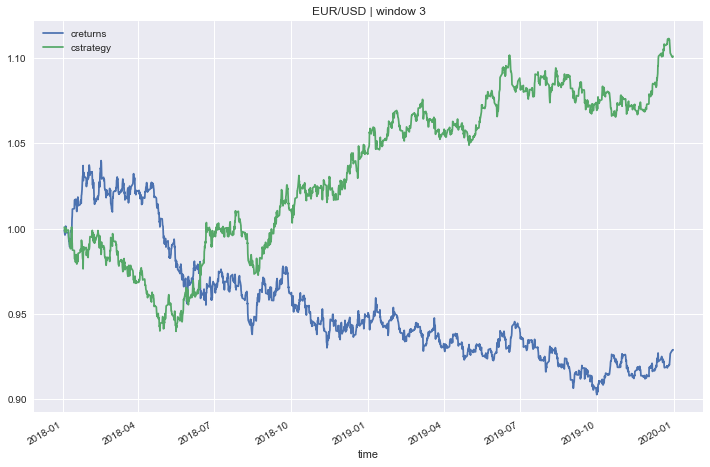

In [46]:
 data[["creturns", "cstrategy"]].plot(figsize=(12,8),
                                     title="EUR/USD | window 3")
plt.show()

# Variations

In [61]:
to_plot = ["returns"]

In [62]:
for w in [1, 2, 3, 4, 5, 10]:
    data["position{}".format(w)] = -np.sign(data["returns"].rolling(w).mean())
    data["strategy{}".format(w)] = data["position{}".format(w)].shift(1) * data["returns"]
    to_plot.append("strategy{}".format(w))

In [63]:
data

,price,returns,position,strategy,creturns,cstrategy,position1,strategy1,position2,strategy2,position3,strategy3,position4,strategy4,position5,strategy5,position10,strategy10
time,,,,,,,,,,,,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203,1.0,-0.000718,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981,1.0,-0.001222,1.0,-0.001222,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225,1.0,-0.000757,1.0,-0.000757,1.0,-0.000757,1.0,NaN,NaN,NaN,NaN,NaN
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229,-1.0,0.000004,1.0,0.000004,1.0,0.000004,1.0,0.000004,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138


In [64]:
to_plot

['returns',
 'strategy1',
 'strategy2',
 'strategy3',
 'strategy4',
 'strategy5',
 'strategy10']

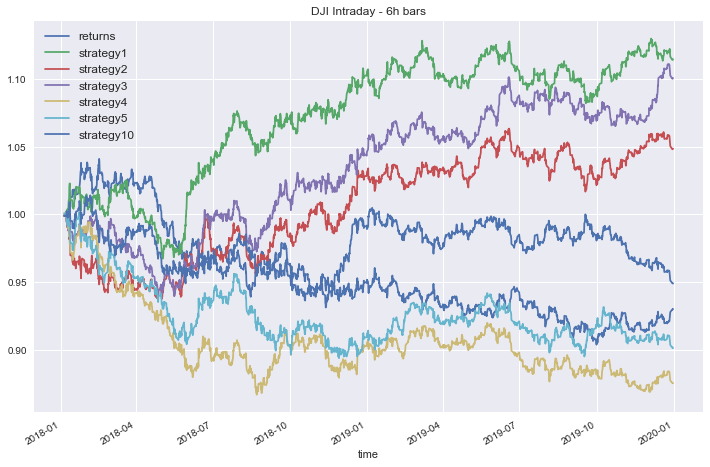

In [65]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(figsize=(12,8))
plt.title("DJI Intraday - 6h bars", fontsize=12)
plt.legend(fontsize=12)
plt.show()